### Project Case Scenario
In this assignment, you are a Data Analyst working at a Real Estate Investment Trust. The Trust would like to start investing in Residential real estate. You are tasked with determining the market price of a house given a set of features. You will analyze and predict housing prices using attributes or features such as square footage, number of bedrooms, number of floors, and so on. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import PolynomialFeatures


<b> 1) Imoprting and Loading Data </b>

In [2]:
file_name='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
df=pd.read_csv(file_name)

In [3]:
df.head(6)

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,5,7237550310,20140512T000000,1225000.0,4.0,4.50,5420,101930,1.0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930


In [5]:
 df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

#### Preprocessing data

We are going to remove the first two columns becuase these features are not usefull for our goal.

In [6]:
df.drop(['Unnamed: 0','id'], axis=1, inplace=True)

In [7]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
# I am chekin wheter is null samples in dataset or not. 
df.isnull().sum(axis = 0)

date              0
price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

The result show there are null in the datasets. I am goin go fix nulls by replacing the null values in bedrooms and bathrooms by mean of them.

In [11]:
mean_bed = df['bedrooms'].mean()
mean_bath = df['bathrooms'].mean()

df['bedrooms'].replace(np.nan,mean_bed , inplace=True)
df['bathrooms'].replace(np.nan,mean_bath , inplace=True)

In [12]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


### Question 3

Use the method <code>value_counts</code> to count the number of houses with unique floor values, use the method <code>.to_frame()</code> to convert it to a dataframe.


In [14]:
unique_floors = df["floors"].value_counts()
unique_floors.to_frame()


,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


### Question 4

Use the function <code>boxplot</code> in the seaborn library  to  determine whether houses with a waterfront view or without a waterfront view have more price outliers.

<AxesSubplot:xlabel='waterfront', ylabel='price'>

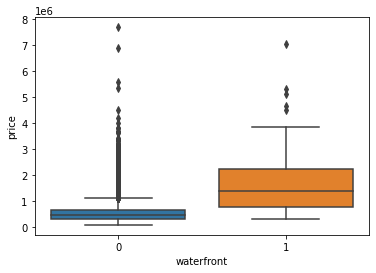

In [15]:
sns.boxplot(x= 'waterfront', y='price', data=df)

### Question 5

Use the function <code>regplot</code>  in the seaborn library  to  determine if the feature <code>sqft_above</code> is negatively or positively correlated with price.

<AxesSubplot:xlabel='sqft_above', ylabel='price'>

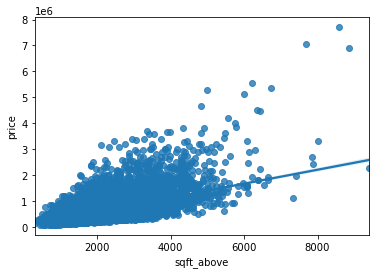

In [16]:
sns.regplot(x= 'sqft_above', y= 'price', data = df)

In [19]:
#We can use the Pandas method corr()  
#to find the feature other than price that is most correlated with price.

df.corr()['price'].sort_values()

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

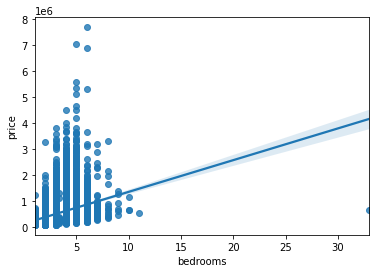

In [20]:
sns.regplot(x= 'bedrooms', y= 'price', data = df)

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

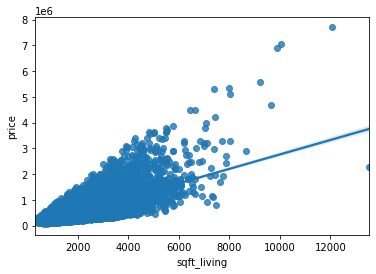

In [21]:
sns.regplot(x= 'sqft_living', y= 'price', data = df)

<AxesSubplot:xlabel='long', ylabel='price'>

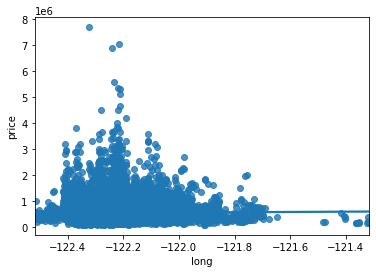

In [24]:
sns.regplot(x= 'long', y= 'price', data = df)

## Model

We can Fit a linear regression model using the longitude feature 'long' and caculate the R^2.

R-squared is a statistical measure that represents the goodness of fit of a regression model. The ideal value for r-square is 1. The closer the value of r-square to 1, the better is the model fitted

In [35]:
from sklearn.linear_model import LinearRegression

# Setting the model
X = df[['long']]
#X_ = X.reshape(1, -1)
Y = df['price']


In [36]:

ml.fit(X, Y)
print('R^2 score is:', ml.score(X,Y))

R^2 score is: 0.00046769430149007363


<b>Model develping with proper features</b>

In [38]:
# the selected features are:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    

In [39]:
features = df[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]]

In [40]:
ml.fit(features, Y)
print('R^2 score is:', ml.score(features,Y))

R^2 score is: 0.6576952831938372


In [44]:
Y_hat = ml.predict(features)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


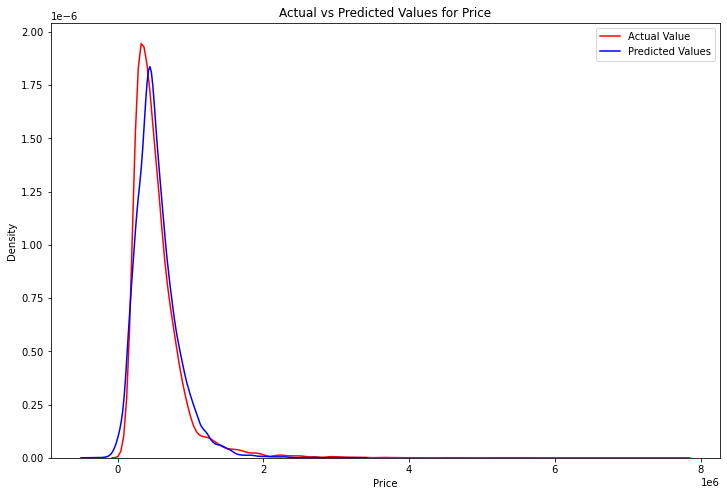

In [48]:
fig = plt.figure(figsize=(12,8))

ax1 = sns.distplot(df['price'], hist=False, color="r")
ax2 = sns.distplot(Y_hat, hist=False, color="b",  ax=ax1)

plt.legend(labels=['Actual Value','Predicted Values'])

plt.title('Actual vs Predicted Values for Price')
plt.xlabel('Price')


plt.show()
plt.close()

In [46]:
Y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [47]:
Y_hat

array([283488.15638232, 662312.15638232, 306568.15638232, ...,
       304096.15638232, 428576.15638232, 303896.15638232])

### Question 8

Create a pipeline object to predict the 'price', fit the object using the features in the list <code>features</code>, and calculate the R^2.

In [51]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [52]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
pipe=Pipeline(Input)

In [53]:
pipe.fit(features, Y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [54]:
pipe.score(features,Y)

0.751272014855004

### Model Evaluation and Refinement

In [55]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [57]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


### Question 

Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data.


In [77]:
from sklearn.linear_model import Ridge

Ridge_Model=Ridge(alpha=0.1)

Ridge_Model.fit(x_train, y_train)

print('R^2 score for train data is: ',Ridge_Model.score(x_train, y_train))

print('R^2 score for test data is: ',Ridge_Model.score(x_test, y_test))

R^2 score for train data is:  0.6594378534950246
R^2 score for test data is:  0.6478759163939114


### Question

Perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, set the regularisation parameter to 0.1, and calculate the R^2 utilising the test data provided. Take a screenshot of your code and the R^2.

In [58]:
from sklearn.linear_model import Ridge


poly_r=PolynomialFeatures(degree=2)
x_train_pr=poly_r.fit_transform(x_train[['floors', 'waterfront','lat' ,'bedrooms' ,'sqft_basement' ,'view' ,'bathrooms','sqft_living15','sqft_above','grade','sqft_living']])
x_test_pr=poly_r.fit_transform(x_test[['floors', 'waterfront','lat' ,'bedrooms' ,'sqft_basement' ,'view' ,'bathrooms','sqft_living15','sqft_above','grade','sqft_living']])

In [60]:

Ridge_Model=Ridge(alpha=0.1)

Ridge_Model.fit(x_train_pr, y_train)

Ridge(alpha=0.1)

In [61]:
print('R^2 score for train data is: ',Ridge_Model.score(x_train_pr, y_train))

R^2 score is:  0.7418167438702681


In [62]:
Y_hat_pr = Ridge_Model.predict(x_train_pr)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


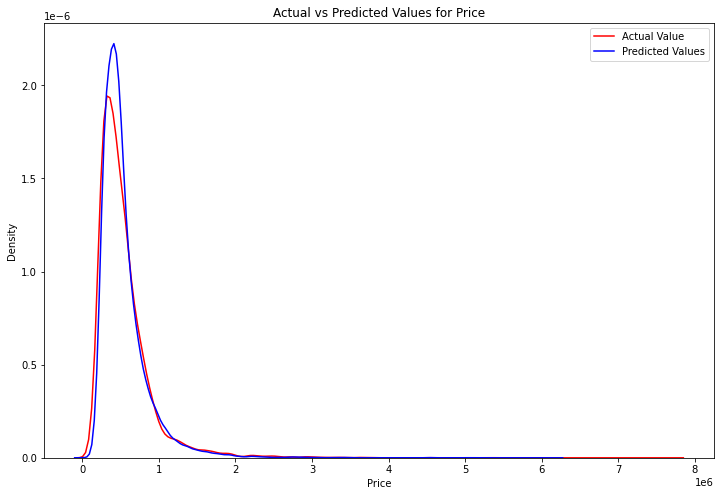

In [63]:
fig = plt.figure(figsize=(12,8))

ax1 = sns.distplot(y_train, hist=False, color="r")
ax2 = sns.distplot(Y_hat_pr, hist=False, color="b",  ax=ax1)

plt.legend(labels=['Actual Value','Predicted Values'])

plt.title('Actual vs Predicted Values for Price')
plt.xlabel('Price')


plt.show()
plt.close()

##### Testing data

In [72]:
print('R^2 score for test data is: ',Ridge_Model.score(x_test_pr, y_test))

R^2 score for test data is:  0.7002744286278395


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


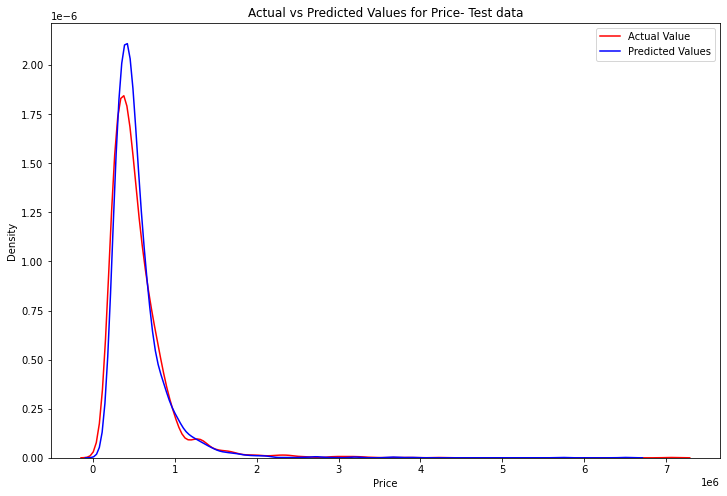

In [74]:
Y_test_pr = Ridge_Model.predict(x_test_pr)
fig = plt.figure(figsize=(12,8))

ax1 = sns.distplot(y_test, hist=False, color="r")
ax2 = sns.distplot(Y_test_pr, hist=False, color="b",  ax=ax1)

plt.legend(labels=['Actual Value','Predicted Values'])

plt.title('Actual vs Predicted Values for Price- Test data')
plt.xlabel('Price')


plt.show()
plt.close()